C:\Users\ghiff\AppData\Local\Temp\ipykernel_15588\3647472355.py:10: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_path)


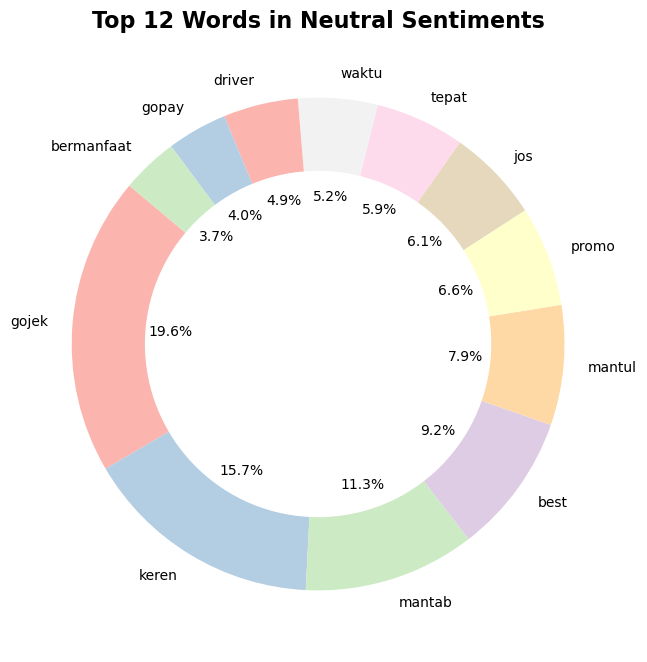

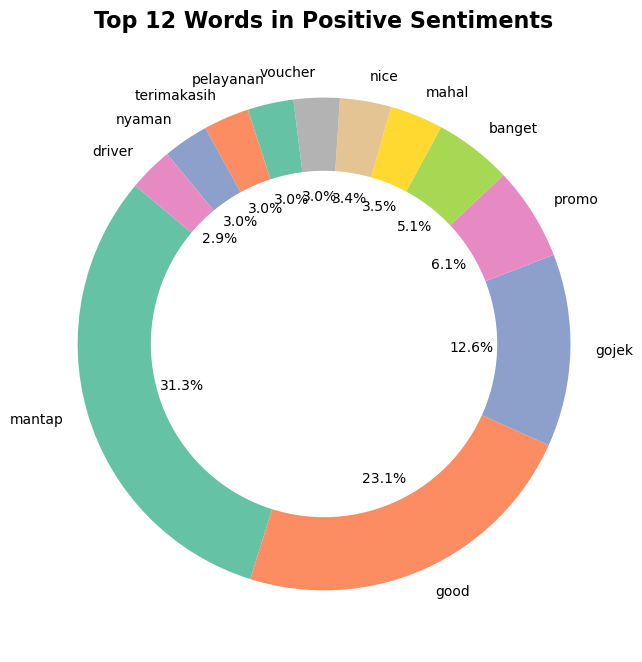

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

# Path file input
input_path = r'C:\Users\ghiff\Documents\kuliah\Analisa_Sentimen_Gojek\percobaan 14\data_sentien.csv'

# Load dataset
df = pd.read_csv(input_path)

# Membersihkan kolom 'data_Preprocessing' dari tanda-tanda yang tidak diinginkan ([], '', ,)
df['data_Preprocessing'] = df['data_Preprocessing'].str.replace(r"[\[\]',]", "", regex=True)

# Filter data berdasarkan sentimen
df_neutral = df[df['sentimen'] == 'neutral']
df_positive = df[df['sentimen'] == 'positive']

# Fungsi untuk mendapatkan kata unik dan hitungannya
def get_top_words(df, top_n=12):
    all_words = df['data_Preprocessing'].str.split(expand=True).stack()
    word_counts = Counter(all_words)
    top_words = word_counts.most_common(top_n)
    words, counts = zip(*top_words)
    return pd.DataFrame({'words': words, 'count': counts})

# Neutral
top_neutral_words = get_top_words(df_neutral, top_n=12)

# Positive
top_positive_words = get_top_words(df_positive, top_n=12)

# Fungsi untuk membuat Donut Plot
def plot_donut(data, title, colors, save_path=None):
    plt.figure(figsize=(8, 8))
    my_circle = plt.Circle((0, 0), 0.7, color='white')
    plt.pie(data['count'], labels=data['words'], colors=colors, autopct='%1.1f%%', startangle=140)
    plt.gca().add_artist(my_circle)
    plt.title(title, fontsize=16, weight='bold')
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# Warna untuk Donut Plot
colors_neutral = ListedColormap(plt.cm.Pastel1.colors).colors
colors_positive = ListedColormap(plt.cm.Set2.colors).colors

# Plot dan Simpan Grafik
plot_donut(top_neutral_words, 'Top 12 Words in Neutral Sentiments', colors_neutral, save_path='neutral_donut_plot.png')
plot_donut(top_positive_words, 'Top 12 Words in Positive Sentiments', colors_positive, save_path='positive_donut_plot.png')
